In [51]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [52]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [53]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [54]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [55]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numeric_cols = df_market_data.select_dtypes(include=[np.number]).columns 
df_market_numeric = df_market_data[numeric_cols]
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_features = scaler.fit_transform(df_market_numeric)




In [56]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_features ,index=df_market_data.index, columns=df_market_data.columns)



# Display the first few rows of the scaled data
#print(df_scaled.head(10))

# Copy the crypto names from the original data
df_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
#df_scaled.set_index("coin_id",inplace = True)

# Display sample data
df_scaled.head()







,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


---

### Find the Best Value for k Using the Original Data.

In [57]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [58]:
if 'coin_id' in df_scaled.columns: 
    df_numeric_only = df_scaled.drop('coin_id', axis=1) # Ensuring only numeric data 
else:
    df_numeric_only = df_scaled.copy()

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using df_market_data_scaled
# 3. Append the model.inertia_ to the inertia list

# Loop through each k-value
for k in k_values:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_numeric_only )
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print("Inertia values for k from 1 to 11:")
print(inertia_values)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Inertia values for k from 1 to 11:
[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 65.22036416927935, 52.82981853382919, 43.7864349541418, 37.52773961065439, 33.07092554993108, 28.9890732836795]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
# Create a dictionary with k-values and inertia values
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Data for Elbow Curve:")
print(df_elbow)

# Plot the Elbow curve
#plt.figure(figsize=(10, 6))
#plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('Inertia')
#plt.title('Elbow Curve')
#plt.xticks(df_elbow['k'])
#plt.grid(True)
#plt.show()

plt_elbow = df_elbow.hvplot.line(
                x = "k", y = "inertia", xticks = k_values)
plt_elbow

Data for Elbow Curve:
    k     inertia
0   1  287.000000
1   2  195.820218
2   3  123.190482
3   4   79.022435
4   5   65.220364
5   6   52.829819
6   7   43.786435
7   8   37.527740
8   9   33.070926
9  10   28.989073


:Curve   [k]   (inertia)

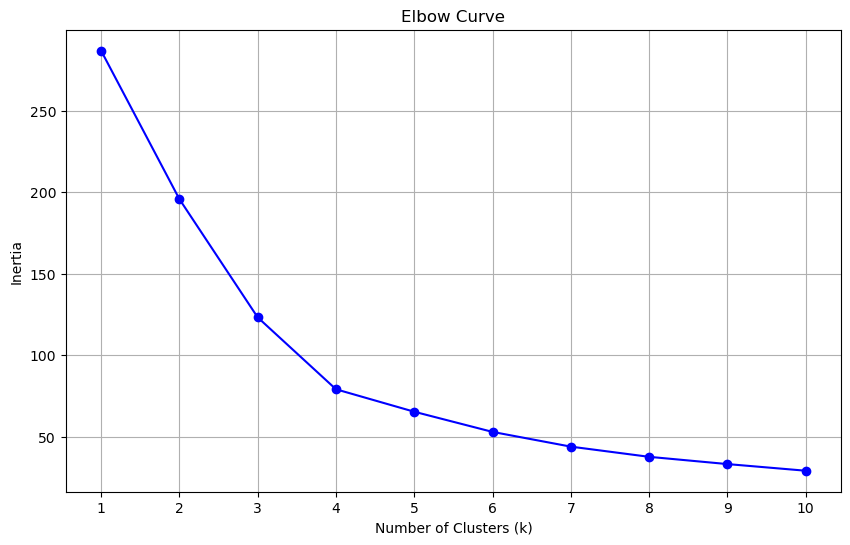

In [60]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k
plt.figure(figsize=(10,6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for "k" is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [61]:
# Initialize the K-Means model using the best value for k
# Initialize the KMeans model using the best value for k
kmeans = KMeans(n_clusters = 4, random_state=1)

# Initialize the StandardScaler
scaler = StandardScaler()


In [62]:
# Fit the K-Means model using the scaled data

kmeans.fit(df_numeric_only)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [63]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df_market_data['Cluster'] = kmeans.predict(df_numeric_only)


# Predict the clusters
cluster_labels = kmeans.predict(df_numeric_only)


# Print the resulting array of cluster values.
# Print the resulting array of cluster values
print("\nCluster Labels:")
print(cluster_labels)


Cluster Labels:
[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [64]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [65]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data['Cluster'] = cluster_labels

# Display sample data
print("\nSample Data with Cluster Labels:")
print(df_market_data.head())


Sample Data with Cluster Labels:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-ca

In [66]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
scatter_plot = df_market_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',               # Color points based on cluster labels
    hover_cols=['name'],    # Hover to show cryptocurrency name on hover
    title='Cryptocurrency Price Change scatter Plot',
    xlabel='24h Price Change(%)',
    ylabel='7h Price Change (%)',
    width=800,
    height=600
)
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [67]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [68]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_numeric)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_numeric.index)

# View the first five rows of the DataFrame. 
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


In [69]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
# Create a DataFrame to display the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# Display the explained variance ratio
print(explained_variance_df)

  Principal Component  Explained Variance Ratio
0                 PC1                  0.976037
1                 PC2                  0.023028
2                 PC3                  0.000748


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 98% of the total variance is condensed into the 3 PCA variables.

In [70]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df['coin_id'] = df_market_data.index


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the PCA Data

In [71]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 11))  


# Display the list
print("List of k-values from 1 to 11:")
print(k_values)



List of k-values from 1 to 11:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [72]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
k_range = range(1, 11)
# Inside the loop:

# Loop through the range of k values
for k in k_range:
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_numeric)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
for k, inertia in zip(k_range, inertia_values):
    print(f'k={k}, Inertia={inertia:.2f}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

k=1, Inertia=69983541.80
k=2, Inertia=8193203.59
k=3, Inertia=2592706.88
k=4, Inertia=835227.44
k=5, Inertia=437329.53
k=6, Inertia=269606.06
k=7, Inertia=199892.12
k=8, Inertia=157329.52
k=9, Inertia=118743.88
k=10, Inertia=93040.67


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:

# Create a dictionary with k-values and inertia values
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Data for Elbow Curve:")
print(df_elbow)

# Plot the Elbow curve
#plt.figure(figsize=(10, 6))
#plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('Inertia')
#plt.title('Elbow Curve')
#plt.xticks(df_elbow['k'])
#plt.grid(True)
#plt.show()

plt_elbow = df_elbow.hvplot.line(
                x = "k", y = "inertia", xticks = k_values)
plt_elbow



Data for Elbow Curve:
    k       inertia
0   1  6.998354e+07
1   2  8.193204e+06
2   3  2.592707e+06
3   4  8.352274e+05
4   5  4.373295e+05
5   6  2.696061e+05
6   7  1.998921e+05
7   8  1.573295e+05
8   9  1.187439e+05
9  10  9.304067e+04


:Curve   [k]   (inertia)

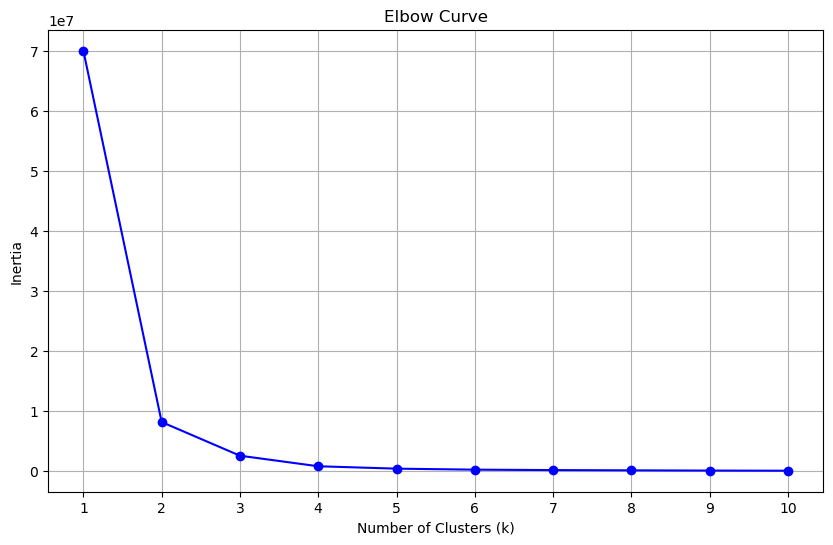

In [74]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k
plt.figure(figsize=(10,6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** the best value for 'K' is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it not differ from the value of the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the KMeans model using the best value for k
kmeans = KMeans(n_clusters = 4, random_state=1)

# Initialize the StandardScaler
scaler = StandardScaler()


In [76]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_numeric_only)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [77]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_market_numeric)


# Print the resulting array of cluster values.
print(clusters)



[0 0 1 0 2 0 0 0 3 0 0 1 3 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 1 0]


In [78]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data['Cluster'] = cluster_labels

# Display sample data
print("\nSample Data with Cluster Labels:")
print(df_market_data.head())



Sample Data with Cluster Labels:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-ca

In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Copy the DataFrame for plotting
df_plot = df_scaled.copy()

# Add the cluster column from K-Means results to df_plot
df_plot['cluster'] = cluster_labels  # Replace cluster_labels with the actual variable storing K-Means labels

# Create the scatter plot
scatter_plot = df_plot.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='cluster',               # Color by cluster
    cmap='viridis',            # Color map
    hover_cols=['coin_id'],    # Hover information
    title='Cryptocurrency Clusters'
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [80]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))
plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

In [81]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
  Using fewer features to cluster the data with K-Means can have several impacts:

Reduced Complexity: Reducing the number of features simplifies the model, which can make it easier to interpret and visualize the clustering results. For example, reducing from high-dimensional space to principal components (e.g., 2 or 3 dimensions) allows for clearer scatter plots and more intuitive understanding of the clusters.

Preservation of Cluster Structure: If the reduction method (such as PCA) preserves the majority of the variance, the essential clustering structure in the original high-dimensional space can still be captured. This is evident if the optimal number of clusters remains consistent when using the reduced feature set.

Improved Computational Efficiency: Fewer features generally lead to faster computation times for K-Means clustering. This is especially beneficial when dealing with large datasets.

Possible Loss of Detail: While PCA captures the most variance, some detailed information might be lost in the process. This can affect the granularity of clusters, potentially making them less distinct if the removed features contained important distinguishing information.

Visualization and Interpretation: Fewer features can make it easier to visualize and interpret the clusters. For instance, plotting clusters in 2D or 3D space (as with PCA components) can provide clear insights into the separation and characteristics of clusters.

In summary, using fewer features via dimensionality reduction techniques like PCA can streamline the clustering process, making it computationally efficient and easier to visualize, while potentially preserving the core clustering patterns. However, it is important to ensure that the reduction method retains enough of the original data's variance to avoid losing significant clustering information.